In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"C:\Users\Saad\Desktop\Data.xlsx")

# Data Preprocessing

In [3]:
dumms1 = pd.get_dummies(data['Fuel'])
data = pd.concat([data, dumms1], axis =1)

In [4]:
data.drop(['Petrol Electric'], inplace=True, axis=1)

In [5]:
data.drop(['Fuel'], inplace=True, axis=1)

In [6]:
mapping = {'Y':1, 'N':0}
data['Second Vehicle'] = data['Second Vehicle'].map(mapping)

In [7]:
dumms2 = pd.get_dummies(data['Vehicle Class'])
data = pd.concat([data, dumms2], axis =1)
data.drop(['Vehicle Class', 'Three Wheeled Goods Vehicle'], inplace=True, axis=1)

In [8]:
dumms3 = pd.get_dummies(data['Category'])
data = pd.concat([data, dumms3], axis =1)
data.drop(['Non Transport'], inplace=True, axis=1)

In [9]:
data.drop(['Category'], inplace=True, axis=1)

In [101]:
dumms4 = pd.get_dummies(data['Body Type'])
data = pd.concat([data, dumms4], axis =1)
data.drop(['Body Type','Station Wagon'], inplace=True, axis=1)

In [102]:
data.drop(['Company','Model', 'S.No'], inplace=True, axis=1)

# Building the model

In [12]:
from sklearn.cluster import KMeans

In [103]:
from yellowbrick.cluster import KElbowVisualizer

In [14]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
# standardize a dataset
data = scaler.fit_transform(data)

In [106]:
model = KMeans()

C:\Users\Faayez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Faayez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Faayez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Faayez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Faayez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default val

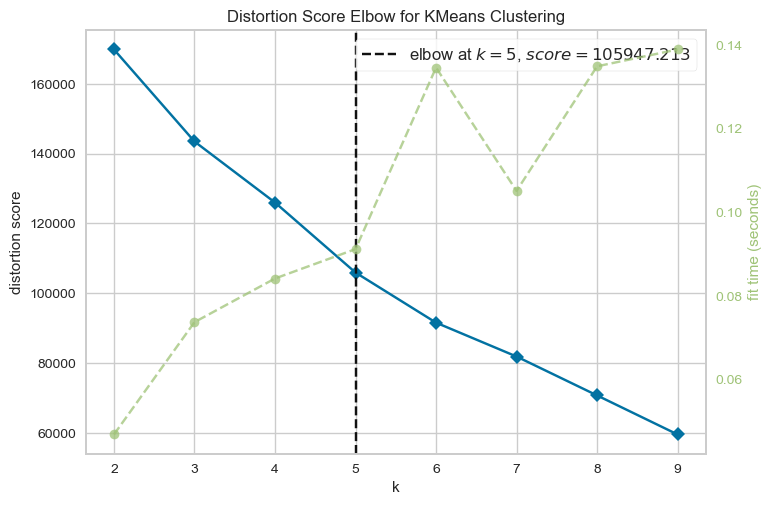

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

# Therefore optimal number of clusters is 5

Clustering

In [108]:
#Initialize our model
kmeans = KMeans(n_clusters=5)

In [109]:
#Fit our model
kmeans.fit(data)

C:\Users\Faayez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [110]:
clusters = kmeans.predict(data)

In [111]:
data1 = pd.DataFrame(data, columns=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 
                                'Col12', 'Col13', 'Col14', 'Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20', 'Col21', 'Col22',
                                'Col23', 'Col24', 'Col25'])

In [112]:
clusters

array([1, 1, 1, ..., 0, 0, 0])

In [113]:
data1['clusters'] = clusters

In [114]:
data1

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,clusters
0,-1.568553,0.721264,2.981495,-0.488610,10.636068,10.646843,2.104485,-10.646843,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,6.837598,-0.052622,-2.466400,1
1,-1.568553,0.721264,2.981495,-0.488610,10.636068,10.646843,2.104485,-10.646843,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,6.837598,-0.052622,-2.466400,1
2,-1.568553,0.721264,2.981495,-0.488610,10.636068,10.646843,2.104485,-10.646843,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,6.837598,-0.052622,-2.466400,1
3,0.369780,0.721264,-0.299219,-0.488610,-0.095118,-0.093925,-0.216083,0.093925,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,-0.146250,-0.052622,0.405449,0
4,0.369780,-0.107301,-0.299219,-0.488610,-0.095118,-0.093925,-0.216083,0.093925,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,-0.146250,-0.052622,0.405449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,1.338946,6.935503,-0.299219,-0.488610,-0.095118,-0.093925,-0.448239,0.093925,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,-0.146250,-0.052622,0.405449,0
8687,1.338946,6.935503,-0.299219,2.046621,-0.095118,-0.093925,-0.448239,0.093925,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,-0.146250,-0.052622,0.405449,0
8688,1.338946,6.935503,-0.299219,2.046621,-0.095118,-0.093925,-0.448239,0.093925,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,-0.146250,-0.052622,0.405449,0
8689,2.308112,9.006916,-0.299219,2.046621,-0.095118,-0.093925,-0.393599,0.093925,-0.079804,-0.057862,...,-0.281945,-0.05983,-0.071334,-0.058854,-0.086806,-0.028392,-0.146250,-0.052622,0.405449,0


# Visualizing the clusters

In [26]:
from sklearn.decomposition import PCA

In [115]:
#PCA with two principal components
pca_2d = PCA(n_components=2)

In [116]:
# This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(data1.drop(["clusters"], axis=1)))

In [117]:
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

In [118]:
data1 = pd.concat([data1,PCs_2d], axis=1, join='inner')

In [119]:
cluster0 = data1[data1["clusters"] == 0]
cluster1 = data1[data1["clusters"] == 1]
cluster2 = data1[data1["clusters"] == 2]
cluster3 = data1[data1["clusters"] == 3]
cluster4 = data1[data1["clusters"] == 4]
# cluster5 = data1[data1["clusters"] == 5]
# cluster6 = data1[data1["clusters"] == 6]
# cluster7 = data1[data1["clusters"] == 7]

In [61]:
#T-Distributed Stochastic Neighbor Embedding
from sklearn.manifold import TSNE 
#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [62]:
init_notebook_mode(connected=True)

In [120]:
#Building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = '#000000'), # black
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = '#0000FF'), # Blue
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = '#008000'), # Green
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = '#FF0000'),  # Red
                    text = None)
#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster4["PC1_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = '#800080'), # Purple
                    text = None)

# #trace6 is for 'Cluster 5'
# trace6 = go.Scatter(
#                      x = cluster5["PC1_2d"],
#                      y = cluster5["PC2_2d"],
#                      mode = "markers",
#                      name = "Cluster 5",
#                      marker = dict(color = '#FF7F50'), # Purple
#                      text = None)
# #trace7 is for 'Cluster 6'
# trace7 = go.Scatter(
#                      x = cluster6["PC1_2d"],
#                      y = cluster6["PC2_2d"],
#                      mode = "markers",
#                      name = "Cluster 6",
#                      marker = dict(color = '#800080'), # Purple
#                      text = None)
# #trace8 is for 'Cluster 7'
# trace8 = go.Scatter(
#                     x = cluster7["PC1_2d"],
#                     y = cluster7["PC2_2d"],
#                     mode = "markers",
#                     name = "Cluster 7",
#                     marker = dict(color = '#800080'), # Purple
#                     text = None)
data1 = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data1, layout = layout)

iplot(fig)

# Extracting the clusters back to Excel Files for further Analysis

In [121]:
data2 = pd.read_excel(r"C:\Users\Saad\Desktop\Data.xlsx")

In [122]:
data2['Cluster Label'] = clusters

In [123]:
data2

,S.No,Company,Model,Fuel,Vehicle Class,Insurance Validity (in years),Vehicle age (in months),Seats,Second Vehicle,Category,Body Type,CC,Cylinders,HP,Cluster Label
0,1,"Maruti Suzuki India Ltd.,",MARUTI - CIAZ SMART HYBRID SIGMA 1.5L 5MT BSVI...,Petrol Electric,Motor Cab,3,6,5,N,Transport,Sedan,1462,4,103.25,1
1,2,"Maruti Suzuki India Ltd.,",MARUTI - CIAZ SMART HYBRID SIGMA 1.5L 5MT BSVI...,Petrol Electric,Motor Cab,3,6,5,N,Transport,Sedan,1462,4,103.25,1
2,3,"Maruti Suzuki India Ltd.,",MARUTI - CIAZ SMART HYBRID SIGMA 1.5L 5MT BSVI...,Petrol Electric,Motor Cab,3,6,5,N,Transport,Sedan,1462,4,103.25,1
3,4,Tvs Motor Company Ltd,TVS IQUBE ELECTRIC S BOV,Battery,Motor Cycle,5,6,2,N,Non Transport,Solo,0,0,9.39,0
4,5,Tvs Motor Company Ltd,TVS IQUBE ELECTRIC SMARTXONNECT BOV,Battery,Motor Cycle,5,4,2,N,Non Transport,Solo,0,0,9.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,8695,Pur Energy Pvt Ltd,ETRANCE NEO BOV,Battery,Motor Cycle,6,21,2,N,Non Transport,Solo,0,0,0.00,0
8687,8696,M/S Goreen E-Mobility Pvt Ltd,TDR 360Z (ASTRID LITE) BOV,Battery,Motor Cycle,6,21,2,Y,Non Transport,Solo,0,0,0.00,0
8688,8697,M/S Goreen E-Mobility Pvt Ltd,TDR 360Z (ASTRID LITE) BOV,Battery,Motor Cycle,6,21,2,Y,Non Transport,Solo,0,0,0.00,0
8689,8698,Klb Komaki Pvt. Ltd.,KOMAKI VENICE BOV,Battery,Motor Cycle,7,26,2,Y,Non Transport,Solo,0,0,2.21,0


In [124]:
Segment0 = data2[data2['Cluster Label'] == 0]

In [130]:
Segment1 = data2[data2['Cluster Label'] == 1]
Segment2 = data2[data2['Cluster Label'] == 2]
Segment3 = data2[data2['Cluster Label'] == 3]
Segment4 = data2[data2['Cluster Label'] == 4]

In [131]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [133]:
with pd.ExcelWriter("C:/Users/Faayez/Desktop/Segments.xlsx") as writer:
    Segment0.to_excel(writer, sheet_name = 'Sheet_1')
    Segment1.to_excel(writer, sheet_name = 'Sheet_2')
    Segment2.to_excel(writer, sheet_name = 'Sheet_3')
    Segment3.to_excel(writer, sheet_name = 'Sheet_4')
    Segment4.to_excel(writer, sheet_name = 'Sheet_5')